In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
# Load the datasets
Adelaide_Data = pd.read_csv(r"C:\Users\Shriram\Downloads\SOC LAB3\1\WECs_DataSet\Adelaide_Data.csv",header=None)
Perth_Data = pd.read_csv(r"C:\Users\Shriram\Downloads\SOC LAB3\1\WECs_DataSet\Perth_Data.csv",header=None)
Sydney_Data = pd.read_csv(r"C:\Users\Shriram\Downloads\SOC LAB3\1\WECs_DataSet\Sydney_Data.csv",header=None)
Tasmania_Data = pd.read_csv(r"C:\Users\Shriram\Downloads\SOC LAB3\1\WECs_DataSet\Tasmania_Data.csv",header=None)

# Concatenate the datasets along the rows
df = pd.concat([Adelaide_Data, Perth_Data, Sydney_Data, Tasmania_Data], ignore_index=True)

# Print the resulting dataframe
print(df)

              0         1         2         3         4         5         6   \
0       316.5855  223.9277  182.3434  551.5497    7.8641  243.1339  361.0877   
1       530.3136   68.7031   31.5983  175.2582  516.1441   63.4652   67.0954   
2        27.3967  399.0488  565.6854  394.0466  120.2245  558.1293  546.4520   
3       346.1526   59.6375  226.2742  280.9095  402.2161  218.7181  207.0407   
4       317.9144  551.8542  335.4745   40.0240  316.6285  365.6434  416.3060   
...          ...       ...       ...       ...       ...       ...       ...   
287994  447.4090   80.6710   74.8115  495.8420  520.5531  205.9689   20.4930   
287995  565.5693  522.9972  437.3214   88.5190    8.5200  429.1224  564.0161   
287996   49.7652   90.4154  110.6000  532.7479  428.7800  101.1560   13.6231   
287997  539.4314  154.6262  493.8225    2.3327  217.3275  480.6632  565.6854   
287998  565.6854   98.0576  437.2540   58.9012  160.7589  424.0946  509.1169   

              7         8         9   .

<Axes: >

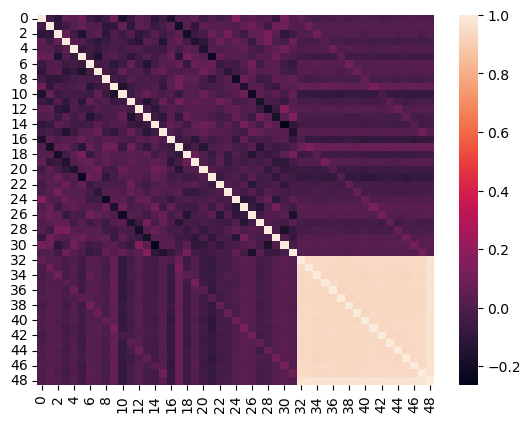

In [77]:
# dataset correlation heatmap
sns.heatmap(df.corr())

In [78]:
# unique values
for i in df:
    print(i," has these unique values:",df[i].unique())

0  has these unique values: [316.5855 530.3136  27.3967 ... 565.5693  49.7652 539.4314]
1  has these unique values: [223.9277  68.7031 399.0488 ...  90.4154 154.6262  98.0576]
2  has these unique values: [182.3434  31.5983 565.6854 ... 110.6    493.8225 437.254 ]
3  has these unique values: [551.5497 175.2582 394.0466 ... 532.7479   2.3327  58.9012]
4  has these unique values: [  7.8641 516.1441 120.2245 ... 428.78   217.3275 160.7589]
5  has these unique values: [243.1339  63.4652 558.1293 ... 101.156  480.6632 424.0946]
6  has these unique values: [361.0877  67.0954 546.452  ... 369.2383 564.0161  13.6231]
7  has these unique values: [115.9284 369.4486  27.3256 ... 506.237  165.082  221.6505]
8  has these unique values: [ 78.6087  14.093  314.1051 ... 450.6601  83.0391 139.6076]
9  has these unique values: [468.3799 375.4462 235.9476 ...  79.0079 552.8977  55.2986]
10  has these unique values: [362.6036  45.4747 514.9275 ... 386.4804 509.7325 453.164 ]
11  has these unique values: [ 

In [79]:
# missing values
print(df.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
dtype: int64


In [80]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
dtype: object

In [81]:
# distinct elements
df.nunique()

0     208985
1     211741
2     210471
3     208601
4     210066
5     206884
6     211797
7     213343
8     210911
9     210168
10    209188
11    207893
12    210969
13    211005
14    210641
15    209725
16    209064
17    213444
18    210476
19    207950
20    211945
21    210515
22    211883
23    213416
24    209610
25    210329
26    208863
27    209634
28    211070
29    212444
30    210517
31    209451
32    260485
33    260495
34    260474
35    260478
36    260485
37    260483
38    260492
39    260496
40    260466
41    260489
42    260500
43    260477
44    260485
45    260474
46    260480
47    260469
48    260492
dtype: int64

In [82]:
# missing values
missing_values = df.isnull().sum()
print(missing_values)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
dtype: int64


In [83]:
# Filling missing values
df.fillna(df.median(), inplace=True)

In [84]:
# Splitting into features and target(taking last column by default) from the dataset
df1= df.iloc[:,0:48]
target=df.iloc[:,48]

In [97]:
scaling=StandardScaler()
 
# Use fit and transform method 
scaled_data=scaling.fit_transform(df1)

# Set the n_components=3
principal=PCA(n_components=3)
x=principal.fit_transform(scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(287999, 3)


In [101]:
data1=pd.DataFrame(x,columns=["PC1","PC2","PC3"])
data1

,PC1,PC2,PC3
0,-2.409163,0.949550,-1.599036
1,-2.545715,1.017405,-1.146960
2,-2.530424,0.884108,-0.786884
3,-2.336626,-0.872527,0.078861
4,-2.529250,-0.583990,0.171034
...,...,...,...
287994,5.830814,-0.233170,-1.858290
287995,6.291484,-1.369718,1.066149
287996,6.531312,1.687737,-1.244318
287997,6.456492,-1.726362,1.869970


In [102]:
# eigen values
principal.components_

array([[-0.00137163,  0.00490091,  0.00306268, -0.00763424,  0.00233858,
        -0.01183236,  0.00854029,  0.00435212, -0.00329866,  0.01841689,
        -0.02294631, -0.00665484,  0.00606371, -0.00658593, -0.00898777,
         0.00612146, -0.02137579,  0.0223057 , -0.01432477,  0.00551147,
        -0.01475001, -0.02214426, -0.00753597, -0.00547713,  0.00105487,
         0.01002851,  0.00755681, -0.00827552, -0.00313938,  0.00616406,
         0.01146312,  0.00538926,  0.24998045,  0.25044077,  0.24875932,
         0.24944328,  0.24968899,  0.24832928,  0.24896456,  0.24928933,
         0.24936406,  0.2502951 ,  0.24943361,  0.24944166,  0.24927641,
         0.24939402,  0.25019654,  0.24994442],
       [ 0.22089723,  0.12992681, -0.29559737,  0.07313314,  0.08553223,
         0.25194618, -0.23928082, -0.18783075, -0.00991224,  0.10004524,
         0.06627885, -0.20198931,  0.17059609,  0.28587154, -0.25641744,
        -0.13480718, -0.01739161, -0.17233262,  0.27771778, -0.00939623,
   

Text(0.5, 1.0, 'PCA Scatter plot')

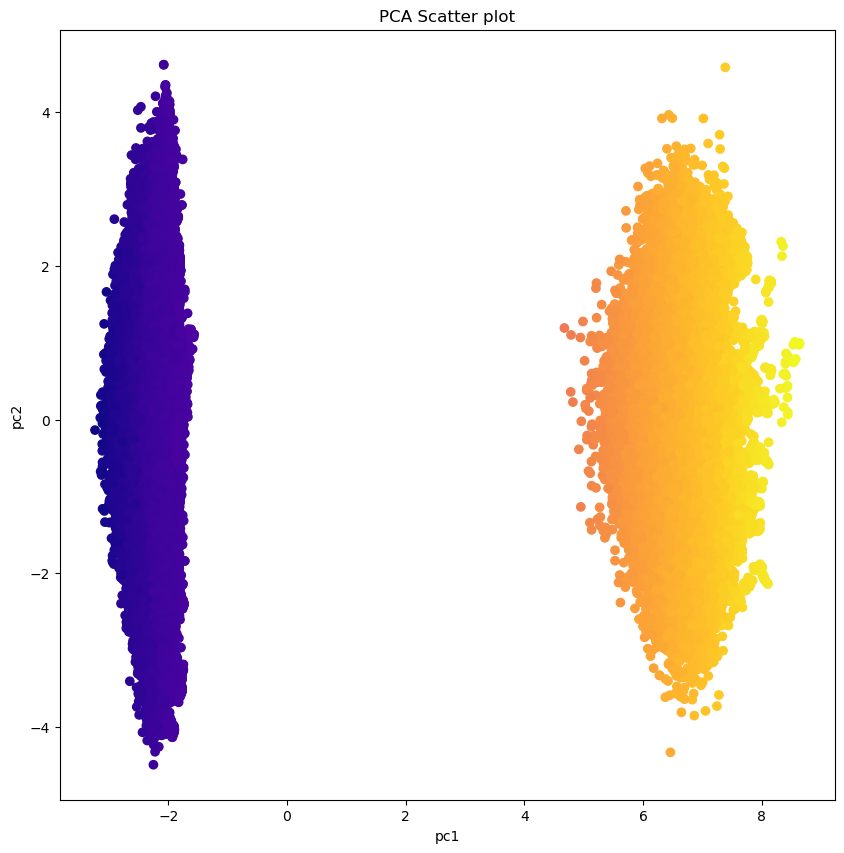

In [111]:
plt.figure(figsize=(5,5))
plt.scatter(x[:,0],x[:,1],c=target,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('PCA Scatter plot')

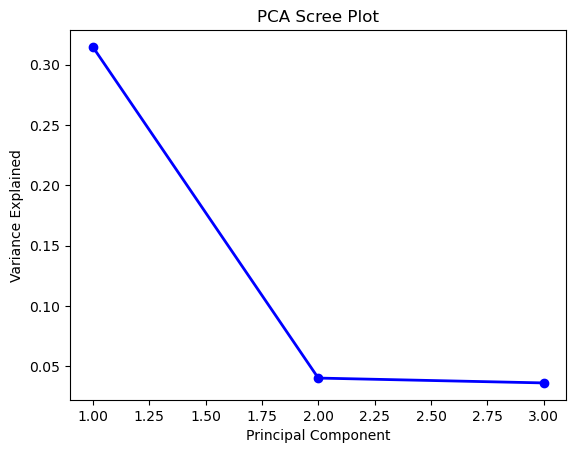

In [103]:
# Scree plot
PC_values = np.arange(principal.n_components_) + 1
plt.plot(PC_values, principal.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

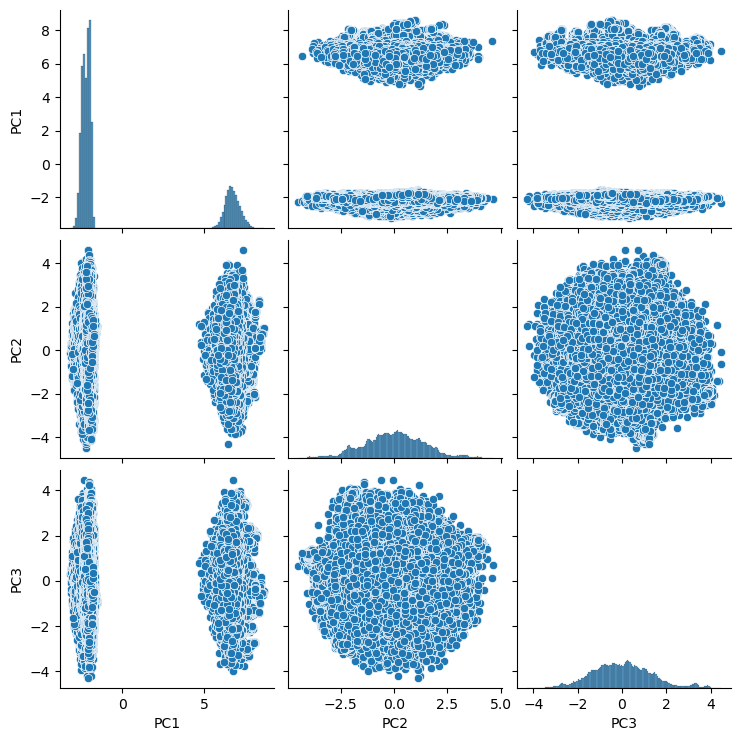

In [104]:
# pair plot between principal components
sns.pairplot(data1)
plt.show()

In [105]:
# converting into numpy arrays
X = np.array(data1['PC1']).reshape(-1, 1)
y = np.array(target).reshape(-1, 1)

In [107]:
# spltting into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
 
regr = LinearRegression()
# fitting the regression model
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9997285978071699


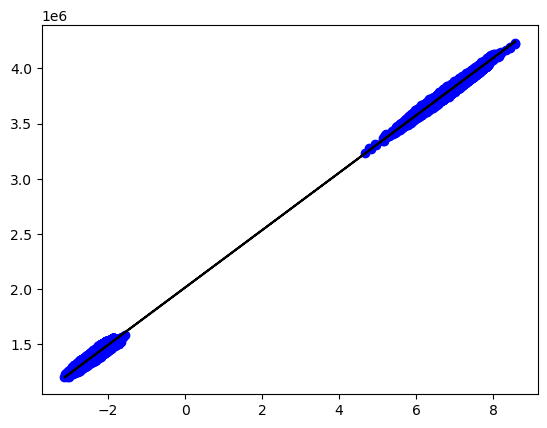

In [108]:
# predicting y value for test data
y_pred = regr.predict(X_test)

# scatter plot
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
 
plt.show()

In [109]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 13301.595277006772
MSE: 279558716.90500945
RMSE: 16720.00947682176
